In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

In [2]:
file_path = "/home/jovyan/protein-protein-docking/prodigy_results.txt"
file_path_rbd = "/home/jovyan/protein-protein-docking/prodigy_RBD_results.txt"
file_path_base = "/home/jovyan/protein-protein-docking/prodigy_base_results.txt"
file_path_leti9 = "/home/jovyan/protein-protein-docking/prodigy_LETI9_results.txt"
file_path_leti10 = "/home/jovyan/protein-protein-docking/prodigy_LETI10_results.txt"

patterns = {
    "pdb_name": r"Parsed structure file ([^\s]+)",
    "inter_contacts": r"intermolecular contacts: (\d+)",
    "charged_charged": r"charged-charged contacts: ([\d.]+)",
    "charged_polar": r"charged-polar contacts: ([\d.]+)",
    "charged_apolar": r"charged-apolar contacts: ([\d.]+)",
    "polar_polar": r"polar-polar contacts: ([\d.]+)",
    "apolar_polar": r"apolar-polar contacts: ([\d.]+)",
    "apolar_apolar": r"apolar-apolar contacts: ([\d.]+)",
    "apolar_nis": r"apolar NIS residues: ([\d.]+)",
    "charged_nis": r"charged NIS residues: ([\d.]+)",
    "binding_affinity": r"Predicted binding affinity.*?:\s+(-?[\d.]+)",
    "dissociation_constant": r"dissociation constant.*?:\s+([\deE\.-]+)"
}

metric_patterns = {
    "pdb_name": "File",
    "inter_contacts": "No. of intermolecular contacts",
    "charged_charged": "No. of charged-charged contacts",
    "charged_polar": "No. of charged-polar contacts",
    "charged_apolar": "No. of charged-apolar contacts",
    "polar_polar": "No. of polar-polar contacts",
    "apolar_polar": "No. of apolar-polar contacts",
    "apolar_apolar": "No. of apolar-apolar contacts",
    "apolar_nis": "Percentage of apolar NIS residues",
    "charged_nis": "Percentage of charged NIS residues",
    "binding_affinity": "Predicted binding affinity (kcal.mol-1)",
    "dissociation_constant": "Predicted dissociation constant (M) at 25.0˚C"
}

In [3]:
with open(file_path, "r") as f:
    content = f.read()

blocks = content.strip().split("[+] Parsed structure file ")
data = []

for block in blocks[1:]:  # Первый элемент пустой
    block = "[+] Parsed structure file " + block  # вернем заголовок
    entry = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, block)
        entry[key] = match.group(1) if match else None
    data.append(entry)

rfd_df = pd.DataFrame(data)
for col in rfd_df.columns:
    if col != "pdb_name":
        rfd_df[col] = pd.to_numeric(rfd_df[col])

In [4]:
rfd_df

,pdb_name,inter_contacts,charged_charged,charged_polar,charged_apolar,polar_polar,apolar_polar,apolar_apolar,apolar_nis,charged_nis,binding_affinity,dissociation_constant
0,6lzg-A.pdb-6lzg-A_2_upd.pdb-complex,74,4.0,2.0,26.0,0.0,16.0,26.0,34.73,27.88,-12.2,1.100000e-09
1,6lzg-A.pdb-6lzg-A_8_upd.pdb-complex,74,2.0,3.0,28.0,0.0,18.0,23.0,34.89,27.78,-12.7,5.200000e-10
2,6lzg-A.pdb-6lzg-A_3_upd.pdb-complex,60,2.0,2.0,19.0,0.0,16.0,21.0,34.81,27.94,-11.3,5.100000e-09
3,6lzg-A.pdb-6lzg-A_6_upd.pdb-complex,67,0.0,9.0,13.0,1.0,27.0,17.0,35.31,27.63,-12.8,4.400000e-10
4,6lzg-A.pdb-6lzg-A_4_upd.pdb-complex,89,5.0,4.0,26.0,1.0,21.0,32.0,34.59,27.94,-13.3,1.900000e-10
5,6lzg-A.pdb-6lzg-A_0_upd.pdb-complex,50,2.0,1.0,17.0,0.0,13.0,17.0,35.24,27.75,-10.4,2.500000e-08
6,6lzg-A.pdb-6lzg-A_9_upd.pdb-complex,55,0.0,1.0,8.0,1.0,29.0,16.0,35.24,27.75,-12.7,4.800000e-10
7,6lzg-A.pdb-6lzg-A_7_upd.pdb-complex,59,4.0,2.0,20.0,0.0,18.0,15.0,34.51,27.88,-12.1,1.300000e-09
8,6lzg-A.pdb-6lzg-A_1_upd.pdb-complex,48,0.0,1.0,7.0,0.0,15.0,25.0,35.23,27.57,-9.7,8.300000e-08
9,6lzg-A.pdb-6lzg-A_5_upd.pdb-complex,50,0.0,2.0,13.0,0.0,22.0,13.0,35.67,27.57,-11.8,2.400000e-09


In [5]:
with open(file_path_base, "r") as f:
    content = f.read()
blocks = content.strip().split("[+] Parsed structure file ")
data = []    
for block in blocks[1:]:  # Первый элемент пустой
    block = "[+] Parsed structure file " + block  # вернем заголовок
    entry = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, block)
        entry[key] = match.group(1) if match else None
    data.append(entry)

base_df = pd.DataFrame(data)
for col in base_df.columns:
    if col != "pdb_name":
        base_df[col] = pd.to_numeric(base_df[col])
base_df

,pdb_name,inter_contacts,charged_charged,charged_polar,charged_apolar,polar_polar,apolar_polar,apolar_apolar,apolar_nis,charged_nis,binding_affinity,dissociation_constant
0,6lzg,69,3.0,10.0,19.0,5.0,23.0,9.0,34.49,25.65,-12.4,8.300000e-10


In [6]:
with open(file_path_leti9, "r") as f:
    content = f.read()
blocks = content.strip().split("[+] Parsed structure file ")
data = []    
for block in blocks[1:]:  # Первый элемент пустой
    block = "[+] Parsed structure file " + block  # вернем заголовок
    entry = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, block)
        entry[key] = match.group(1) if match else None
    data.append(entry)

leti9_df = pd.DataFrame(data)
for col in leti9_df.columns:
    if col != "pdb_name":
        leti9_df[col] = pd.to_numeric(leti9_df[col])
leti9_df.head()

,pdb_name,inter_contacts,charged_charged,charged_polar,charged_apolar,polar_polar,apolar_polar,apolar_apolar,apolar_nis,charged_nis,binding_affinity,dissociation_constant
0,RBD_RSB_6LZG_unrelaxed_rank_001_alphafold2_ptm...,30,1.0,2.0,7.0,1.0,8.0,11.0,40.33,17.68,-8.4,7.100000e-07
1,RBD_RSB_6LZG_unrelaxed_rank_005_alphafold2_ptm...,40,4.0,4.0,20.0,0.0,6.0,6.0,39.78,18.23,-9.7,7.200000e-08
2,RBD_RSB_6LZG_unrelaxed_rank_005_alphafold2_ptm...,36,4.0,6.0,16.0,2.0,5.0,3.0,39.78,18.23,-8.7,4.000000e-07
3,RBD_RSB_6LZG_unrelaxed_rank_005_alphafold2_ptm...,33,4.0,2.0,11.0,0.0,5.0,11.0,39.89,18.03,-8.6,4.800000e-07
4,RBD_RSB_6LZG_unrelaxed_rank_002_alphafold2_ptm...,32,7.0,6.0,11.0,1.0,3.0,4.0,40.00,17.78,-8.3,8.700000e-07


In [7]:
with open(file_path_leti10, "r") as f:
    content = f.read()
blocks = content.strip().split("[+] Parsed structure file ")
data = []    
for block in blocks[1:]:  # Первый элемент пустой
    block = "[+] Parsed structure file " + block  # вернем заголовок
    entry = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, block)
        entry[key] = match.group(1) if match else None
    data.append(entry)

leti10_df = pd.DataFrame(data)
for col in leti10_df.columns:
    if col != "pdb_name":
        leti10_df[col] = pd.to_numeric(leti10_df[col])
leti10_df.head()

,pdb_name,inter_contacts,charged_charged,charged_polar,charged_apolar,polar_polar,apolar_polar,apolar_apolar,apolar_nis,charged_nis,binding_affinity,dissociation_constant
0,RBD_RSB_6LZG_unrelaxed_rank_005_alphafold2_ptm...,43,0.0,6.0,5.0,3.0,12.0,17.0,40.00,18.95,-8.5,5.900000e-07
1,RBD_RSB_6LZG_unrelaxed_rank_002_alphafold2_ptm...,40,2.0,0.0,17.0,0.0,6.0,15.0,39.68,19.58,-9.1,2.200000e-07
2,RBD_RSB_6LZG_unrelaxed_rank_003_alphafold2_ptm...,47,3.0,6.0,17.0,0.0,6.0,15.0,39.23,19.89,-9.2,1.700000e-07
3,RBD_RSB_6LZG_unrelaxed_rank_003_alphafold2_ptm...,40,2.0,8.0,20.0,1.0,3.0,6.0,39.44,20.00,-8.5,5.900000e-07
4,RBD_RSB_6LZG_unrelaxed_rank_003_alphafold2_ptm...,60,2.0,4.0,17.0,1.0,10.0,26.0,39.11,20.67,-9.7,7.100000e-08


In [8]:
with open(file_path_rbd, "r") as f:
    content = f.read()
blocks = content.strip().split("[+] Parsed structure file ")
data = []    
for block in blocks[1:]:  # Первый элемент пустой
    block = "[+] Parsed structure file " + block  # вернем заголовок
    entry = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, block)
        entry[key] = match.group(1) if match else None
    data.append(entry)

rbd_df = pd.DataFrame(data)
for col in rbd_df.columns:
    if col != "pdb_name":
        rbd_df[col] = pd.to_numeric(rbd_df[col])
rbd_df.head()

,pdb_name,inter_contacts,charged_charged,charged_polar,charged_apolar,polar_polar,apolar_polar,apolar_apolar,apolar_nis,charged_nis,binding_affinity,dissociation_constant
0,RBD_RSB_6LZG_unrelaxed_rank_002_alphafold2_ptm...,84,0.0,5.0,16.0,3.0,14.0,46.0,45.50,17.50,-9.2,1.700000e-07
1,RBD_RSB_6LZG_unrelaxed_rank_005_alphafold2_ptm...,116,4.0,9.0,31.0,2.0,20.0,50.0,44.33,17.53,-12.9,3.700000e-10
2,RBD_RSB_6LZG_unrelaxed_rank_004_alphafold2_ptm...,59,1.0,2.0,18.0,1.0,4.0,33.0,45.41,17.86,-7.6,2.700000e-06
3,RBD_RSB_6LZG_unrelaxed_rank_003_alphafold2_ptm...,66,0.0,0.0,8.0,0.0,11.0,47.0,44.67,18.27,-8.4,7.300000e-07
4,RBD_RSB_6LZG_unrelaxed_rank_004_alphafold2_ptm...,70,2.0,1.0,27.0,0.0,7.0,33.0,43.75,18.75,-9.7,8.200000e-08


In [25]:
metrics = rfd_df.drop(columns=["pdb_name"])#[["binding_affinity", "dissociation_constant"]]
num_metrics = len(metrics.columns)

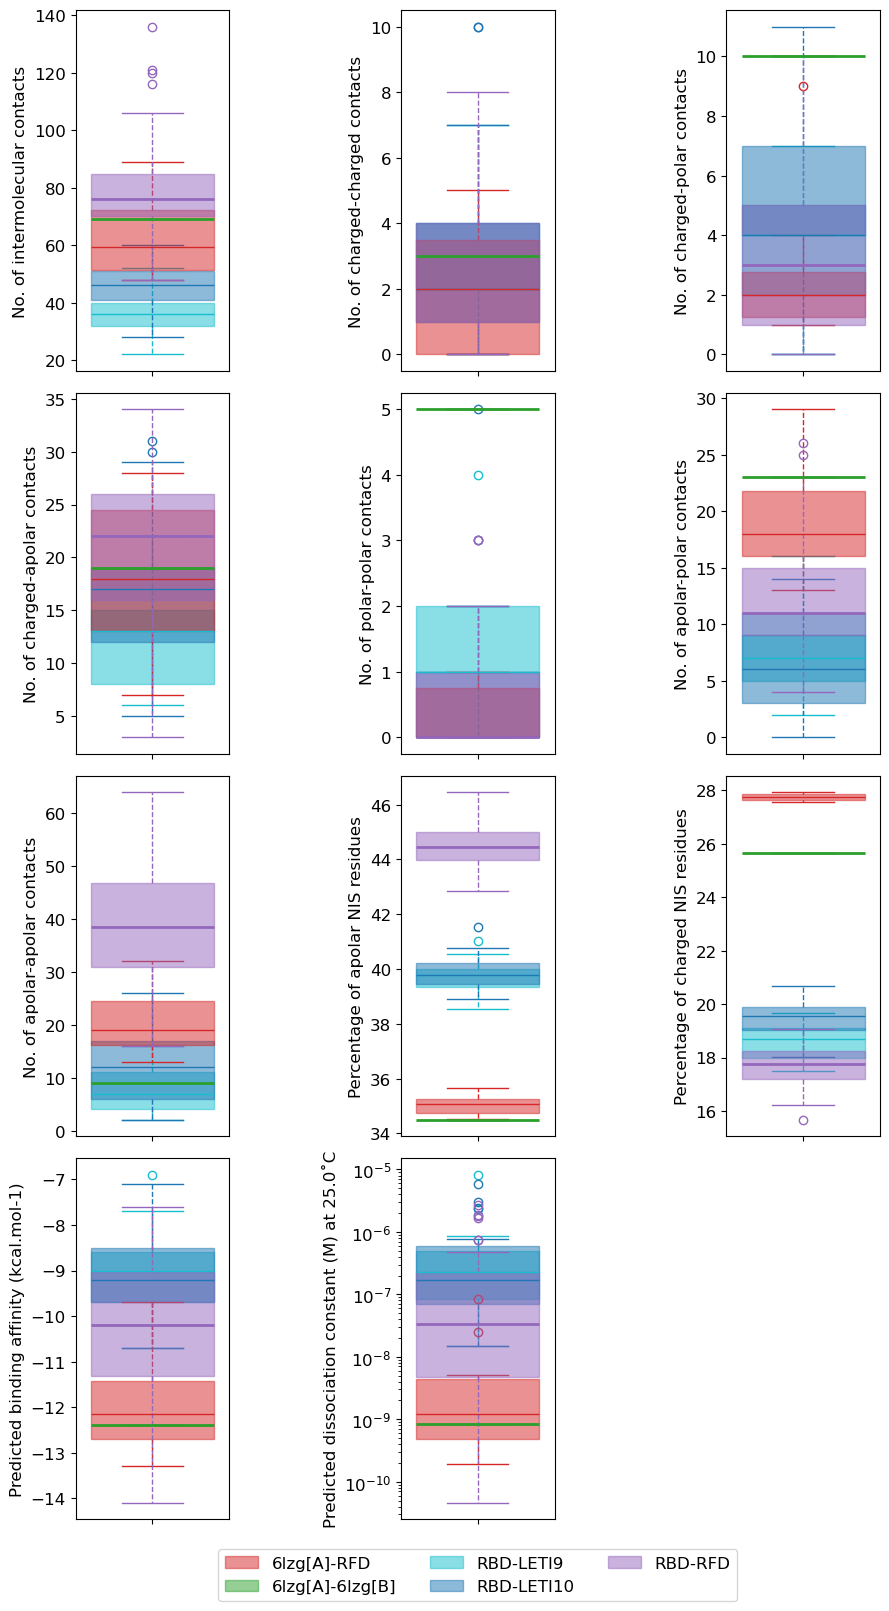

In [31]:
# Размер сетки
cols = 3
rows = math.ceil(num_metrics / cols)

# Размер всей фигуры
plt.figure(figsize=(cols * 3, rows * 4))

for idx, col in enumerate(metrics.columns):
    ax = plt.subplot(rows, cols, idx + 1)
    tab_color = "cyan"
    sns.boxplot(
        data=leti9_df[col],
        ax=ax,
        flierprops={"markeredgecolor": f"tab:{tab_color}"},
        whiskerprops={"color": f"tab:{tab_color}", "linestyle": "--"},
        capprops={"color": f"tab:{tab_color}"},
        boxprops={"facecolor": f"tab:{tab_color}", "alpha": 0.5, "edgecolor": f"tab:{tab_color}"},
        medianprops={"color": f"tab:{tab_color}"},
    )
    tab_color = "blue"
    sns.boxplot(
        data=leti10_df[col],
        ax=ax,
        flierprops={"markeredgecolor": f"tab:{tab_color}"},
        whiskerprops={"color": f"tab:{tab_color}", "linestyle": "--"},
        capprops={"color": f"tab:{tab_color}"},
        boxprops={"facecolor": f"tab:{tab_color}", "alpha": 0.5, "edgecolor": f"tab:{tab_color}"},
        medianprops={"color": f"tab:{tab_color}"},
    )
    tab_color = "red"
    sns.boxplot(
        data=rfd_df[col],
        ax=ax,
        flierprops={"markeredgecolor": f"tab:{tab_color}"},
        whiskerprops={"color": f"tab:{tab_color}", "linestyle": "--"},
        capprops={"color": f"tab:{tab_color}"},
        boxprops={"facecolor": f"tab:{tab_color}", "alpha": 0.5, "edgecolor": f"tab:{tab_color}"},
        medianprops={"color": f"tab:{tab_color}"},
    )
    tab_color = "purple"
    sns.boxplot(
        data=rbd_df[col],
        ax=ax,
        flierprops={"markeredgecolor": f"tab:{tab_color}"},
        whiskerprops={"color": f"tab:{tab_color}", "linestyle": "--"},
        capprops={"color": f"tab:{tab_color}"},
        boxprops={"facecolor": f"tab:{tab_color}", "alpha": 0.5, "edgecolor": f"tab:{tab_color}"},
        medianprops={"color": f"tab:{tab_color}", 'linewidth': 2},
    )
    tab_color = "green"
    sns.boxplot(
        data=base_df[col],
        ax=ax,
        flierprops={"markeredgecolor": f"tab:{tab_color}"},
        whiskerprops={"color": f"tab:{tab_color}", "linestyle": "--"},
        capprops={"color": f"tab:{tab_color}"},
        boxprops={"facecolor": f"tab:{tab_color}", "alpha": 0.5, "edgecolor": f"tab:{tab_color}"},
        medianprops={"color": f"tab:{tab_color}", 'linewidth': 2},
    )
    if col == "dissociation_constant":
    # if col != "binding_affinity":
        ax.set_yscale("log")
    ax.set_ylabel(metric_patterns[col], fontsize=12)
    ax.tick_params(axis='y', labelsize=12)


legend_labels = {
    "6lzg[A]-RFD": "tab:red",
    "6lzg[A]-6lzg[B]": "tab:green",
    "RBD-LETI9": "tab:cyan",
    "RBD-LETI10": "tab:blue",
    "RBD-RFD": "tab:purple"
}

handles = [mpatches.Patch(color=color, label=label, alpha=0.5) for label, color in legend_labels.items()]
plt.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize=12)
plt.tight_layout()
plt.savefig("pdogidy_boxplots.png", bbox_inches='tight')
plt.show()